# imagenes de prediccion comparadas al Groud Truth

In [1]:
import torch
import imageio as iio
import matplotlib.pyplot as plt
from data_processing import utils
from Models.Unet import Unet
import torchvision.transforms.functional as F
import torchvision.transforms as transforms
from PIL import Image
from skimage.transform import resize
import torch.nn as nn
from configparser import ConfigParser
import numpy as np
from sklearn.metrics import f1_score,accuracy_score
import torchvision.transforms.functional as FT
from skimage import filters, measure
import math
import glob
import random

In [3]:
predict_path = '/mnt/Almacenamiento/ODOC_segmentation/predicted/ModelM/'
data_path = '/mnt/Almacenamiento/ODOC_segmentation/data/'
dataset = 'REFUGE'
img = '0001'



In [6]:
def get_paths(data_pred,test=True):
    predicted_img_p = []
    predicted_OD_p = []
    predicted_OC_p = []
    gt_OD_p = []
    gt_OC_p = []

    for p in sorted(glob.glob(predict_path+ '/'+data_pred+'/OC/*')):
        predicted_OC_p.append(p)

    for p in sorted(glob.glob(predict_path+ '/'+data_pred+'/OD/*')):
        predicted_OD_p.append(p)

    if test:
        for p in sorted(glob.glob(data_path + 'images/' + data_pred + '/Test/*')):
            predicted_img_p.append(p)

        for p in sorted(glob.glob(data_path + 'OC/' + data_pred + '/Test/*')):
            gt_OC_p.append(p)

        for p in sorted(glob.glob(data_path + 'OD1/' + data_pred + '/Test/*')):
            gt_OD_p.append(p)
    else:
        for p in sorted(glob.glob(data_path + 'images/' + data_pred + '/*')):
            predicted_img_p.append(p)

        for p in sorted(glob.glob(data_path + 'OC/' + data_pred + '/*')):
            gt_OC_p.append(p)

        for p in sorted(glob.glob(data_path + 'OD1/' + data_pred + '/*')):
            gt_OD_p.append(p)

    return predicted_OC_p, predicted_OD_p, gt_OC_p, gt_OD_p, predicted_img_p

In [22]:
def generate_img( pred, true):
    '''
    In this method we generate img for TP, FP ans FN
    ------------------
    input:
    pred: img 2D with the prediction
    true: img 2D with the ground truth
    ----------------
    output
    a 3D image
    in red dimension we mark the FP
    in green dimension we mark the TP
    in Blue dimension we wark the FN 
    '''
    w,h = pred.shape
    red = np.zeros((w,h))
    green = np.zeros((w,h))
    blue = np.zeros((w,h))

    for c in range(w):
        for r in range(h):
            if (pred[r,c] == 255) and (true[r,c]== 255):
                green[r,c] = 255
            if (pred[r,c] == 255) and (true[r,c]== 0):
                red[r,c] = 255
            if (pred[r,c] == 0) and (true[r,c]== 255):
                blue[r,c] = 255
    img = np.array([red,green,blue])
    img = np.transpose(img, (1,2,0))


    return img

In [8]:
p_OC_D, p_OD_D, gt_OC_D, gt_OD_D, img_D = get_paths('DRISHTI',test=True)
p_OC_R3, p_OD_R3, gt_OC_R3, gt_OD_R3, img_R3 = get_paths('RIM_ONE_R3',test=False)
p_OC_R, p_OD_R, gt_OC_R, gt_OD_R, img_R = get_paths('REFUGE',test=True)
p_OC_O, p_OD_O, gt_OC_O, gt_OD_O, img_O = get_paths('ORIGA',test=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


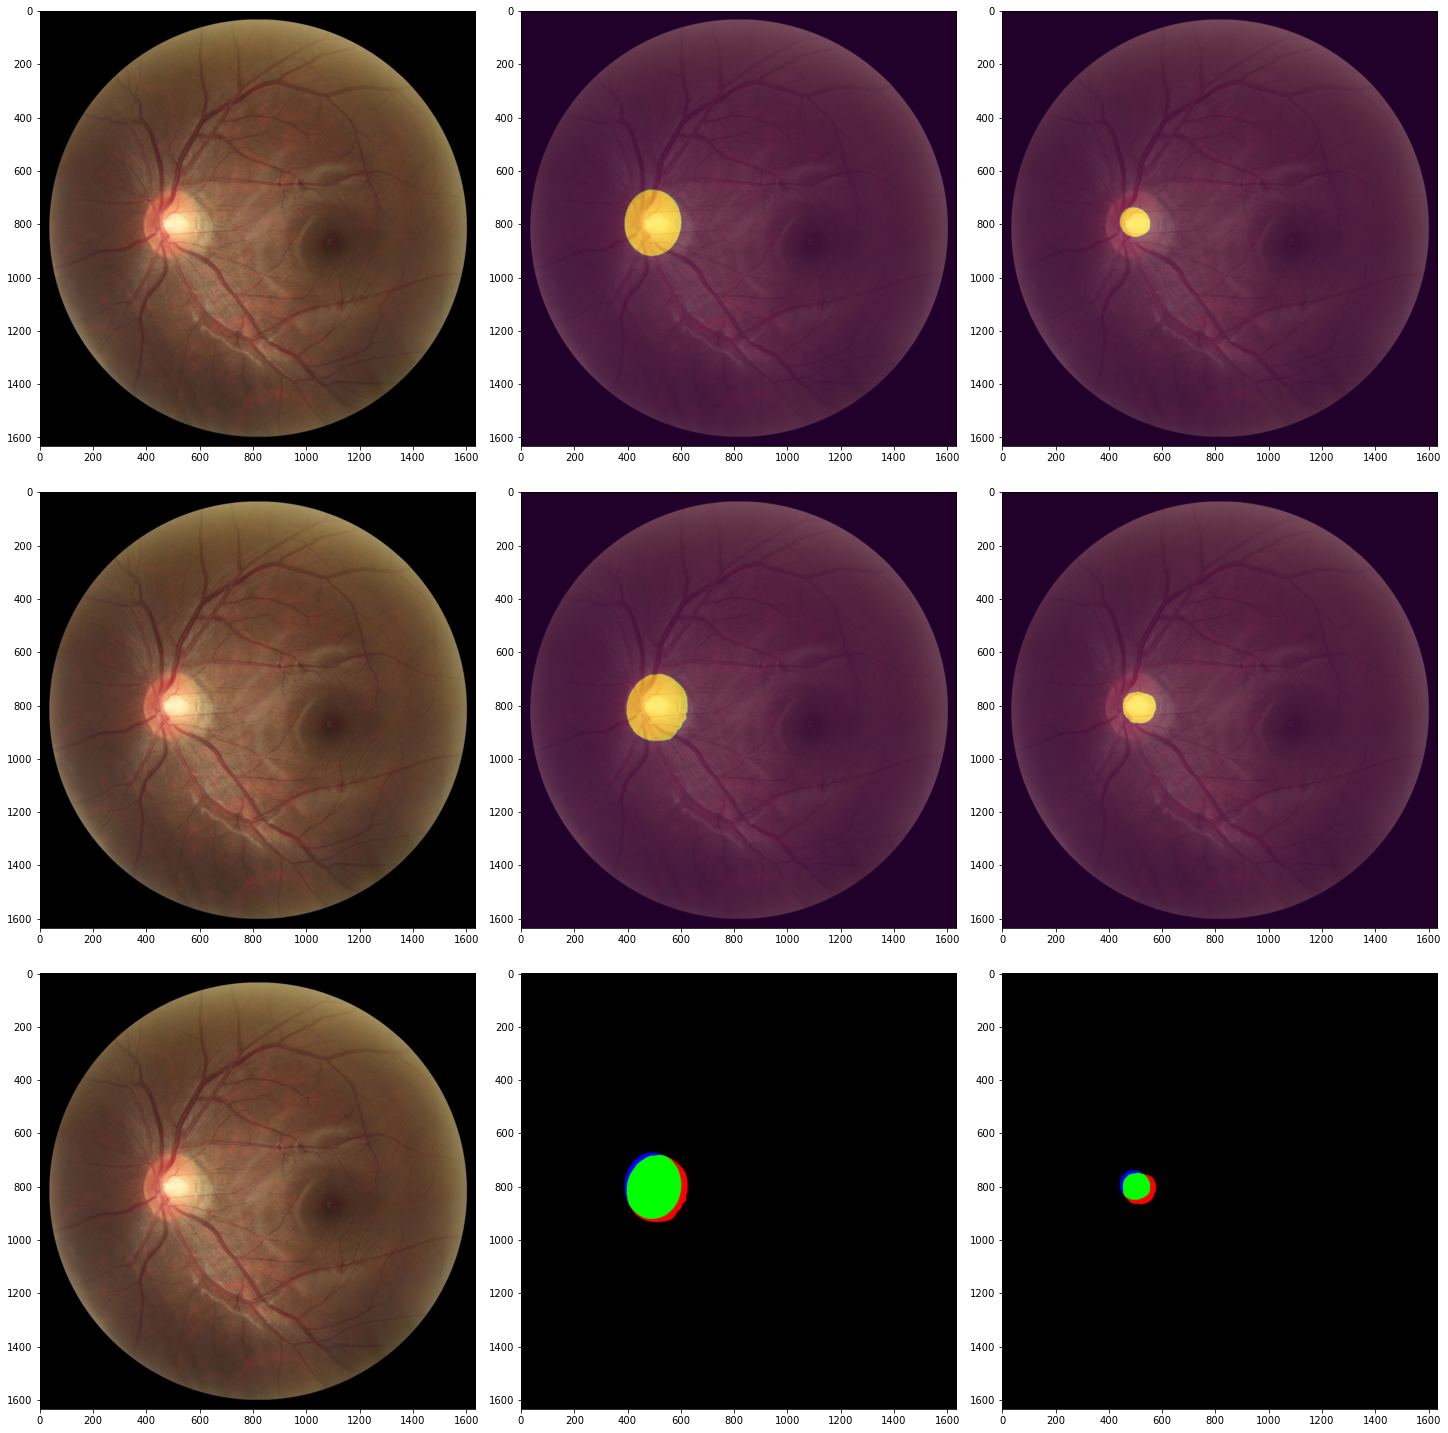

In [27]:
n_img = 38

img = Image.open(img_R[n_img])
gt_OD =  Image.open(gt_OD_R[n_img])
gt_OC =  Image.open(gt_OC_R[n_img])
pred_OD =  Image.open(p_OD_R[n_img])
pred_OC =  Image.open(p_OC_R[n_img])
#print(np.unique(pred_OC))


fig = plt.figure(constrained_layout=True,figsize=(20,20))


axs = fig.subplots(3,3)


axs[0,0].imshow(img)

axs[0,1].imshow(img)
axs[0,1].imshow(gt_OD, alpha=0.5)

axs[0,2].imshow(img)
axs[0,2].imshow(gt_OC, alpha=0.5)

axs[1,0].imshow(img)

axs[1,1].imshow(img)
axs[1,1].imshow(pred_OD, alpha=0.5)

axs[1,2].imshow(img)
axs[1,2].imshow(pred_OC, alpha=0.5)

axs[2,0].imshow(img)

axs[2,1].imshow(generate_img(np.array(pred_OD),np.array(gt_OD)))

axs[2,2].imshow(generate_img(np.array(pred_OC),np.array(gt_OC)))




    